In [17]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import math
from numpy.lib.scimath import sqrt as csqrt

In [77]:
# Prepare the training data
a = np.random.rand(1000,1)
b = np.random.rand(1000,1)
c = np.random.rand(1000,1)

dataXval=np.concatenate((a,b,c),axis=1)

discriminant = (b**2) - (4*a*c)
sol1 = (-b-csqrt(discriminant))/(2*a)
sol2 = (-b+csqrt(discriminant))/(2*a)

sol1real = sol1.real
sol1imag = sol1.imag
sol2real = sol2.real
sol2imag = sol2.imag

dataYval=np.concatenate((sol1real,sol1imag,sol2real,sol2imag),axis=1)

In [98]:
# Model structure
model = Sequential()
model.add(Dense(100, input_dim=3, kernel_initializer='normal', activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4, activation='linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 404       
Total params: 21,004
Trainable params: 21,004
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Model compile
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(dataXval,dataYval, epochs=100, batch_size=32,  validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 23.6960 - mse: 23.6960 - mae: 0.9545 - val_loss: 379.5002 - val_mse: 379.5002 - val_mae: 1.8958
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 35.0063 - mse: 35.0063 - mae: 1.1089 - val_loss: 374.6663 - val_mse: 374.6663 - val_mae: 1.6908
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 30.6918 - mse: 30.6918 - mae: 0.9043 - val_loss: 370.5240 - val_mse: 370.5240 - val_mae: 1.8697
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 12.0480 - mse: 12.0480 - mae: 0.9644 - val_loss: 371.4750 - val_mse: 371.4750 - val_mae: 1.7648
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 33.1236 - mse: 33.1236 - mae: 1.0977 - val_loss: 369.8547 - val_mse: 369.8547 - val_mae: 1.8803
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 27.5661 - mse: 27.5661 - mae: 1.0276 - val_loss: 369.9279 - val_mse: 369.9279 - va

25/25 [==============================] - 0s 3ms/step - loss: 30.5306 - mse: 30.5306 - mae: 0.4099 - val_loss: 295.1020 - val_mse: 295.1020 - val_mae: 1.1280
Epoch 50/100
25/25 [==============================] - 0s 3ms/step - loss: 8.7775 - mse: 8.7775 - mae: 0.3567 - val_loss: 297.6170 - val_mse: 297.6170 - val_mae: 1.0685
Epoch 51/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8999 - mse: 3.8999 - mae: 0.2966 - val_loss: 301.0667 - val_mse: 301.0667 - val_mae: 1.0616
Epoch 52/100
25/25 [==============================] - 0s 3ms/step - loss: 6.8045 - mse: 6.8045 - mae: 0.2655 - val_loss: 300.9749 - val_mse: 300.9749 - val_mae: 1.0398
Epoch 53/100
25/25 [==============================] - 0s 2ms/step - loss: 43.5757 - mse: 43.5757 - mae: 0.4515 - val_loss: 310.2074 - val_mse: 310.2074 - val_mae: 1.0769
Epoch 54/100
25/25 [==============================] - 0s 2ms/step - loss: 24.5520 - mse: 24.5520 - mae: 0.3724 - val_loss: 298.5979 - val_mse: 298.5979 - val_mae: 1.0243

25/25 [==============================] - 0s 3ms/step - loss: 13.0733 - mse: 13.0733 - mae: 0.2425 - val_loss: 258.6248 - val_mse: 258.6248 - val_mae: 0.9066
Epoch 98/100
25/25 [==============================] - 0s 3ms/step - loss: 43.8656 - mse: 43.8656 - mae: 0.4173 - val_loss: 258.9345 - val_mse: 258.9345 - val_mae: 0.9256
Epoch 99/100
25/25 [==============================] - 0s 3ms/step - loss: 28.0620 - mse: 28.0620 - mae: 0.3687 - val_loss: 267.1320 - val_mse: 267.1320 - val_mae: 0.9281
Epoch 100/100
25/25 [==============================] - 0s 3ms/step - loss: 9.7574 - mse: 9.7574 - mae: 0.2221 - val_loss: 267.0826 - val_mse: 267.0826 - val_mae: 0.9050


# Test the model

Text(0, 0.5, 'Prediction')

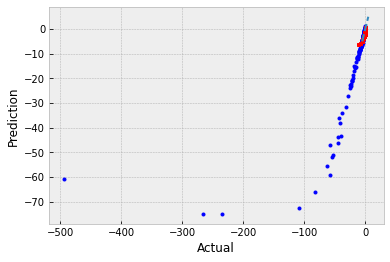

In [106]:
prediction = model.predict(dataXval)
plt.rcParams["figure.figsize"] = (6, 4)
plt.style.use("bmh")
fig, ax = plt.subplots(facecolor='w')
plt.plot(dataYval[:,0],prediction[:,0],'bo',markersize=3) 
plt.plot(dataYval[:,1],prediction[:,1],'rs',markersize=3)
x = np.linspace(-5,5,100)
y = x
plt.plot(x,y,'--')
plt.xlabel('Actual')
plt.ylabel('Prediction')